# **Tutorial 2: Reloading SIDISH model and Visualizing**

This tutorial covers the steps to reload a trained SIDISH model, extract cell embeddings, and visualize results using UMAP. Visualizing SIDISH outputs is essential for understanding high-risk cell distributions and their relationship to clinical outcomes.

### In this tutorial, you will:
- Reload the SIDISH model from a saved checkpoint.  
- Extract cell embeddings for downstream analysis.  
- Generate UMAP plots to visualize high-risk and background cell populations.  
- Adjust visualization parameters to improve cluster separation and highlight key cell populations.

### Outcome:
By the end of this tutorial, you will be able to explore and interpret SIDISH outputs, gaining insights into high-risk cell populations and their potential role in disease progression.

## **Step 1: Import libraries**

In [1]:
import SIDISH as sidish
import sys
import scanpy as sc
import pandas as pd
import numpy as np
import  torch
import random
import os
import matplotlib.pyplot as plt

/Users/admin/miniconda3/envs/sidish/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set Seeds

In [2]:
seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(1)
ite = 0
# Set seeds for reproducibility
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Call the seed setting function
set_seed(seed)

## **Step 2: Reload the saved data and SIDISH model**
### **2.1 Reload saved single-cell data**

In [3]:
path = "./LUNG/"
adata = sc.read_h5ad("{}adata_SIDISH.h5ad".format(path))

# Read survival+bulk dataset
bulk = pd.read_csv("../../DATA/processed_bulk.csv", index_col=0)

### **2.2 Reload trained SIDISH**

In [4]:
sdh = sidish.SIDISH(adata, bulk, "cpu", seed=ite)
sdh.init_Phase1(225, 20, 32, [512, 128], 512, "Adam", 1.0e-4, 1e-4, 0)
sdh.init_Phase2(500, 128, 1e-4, 0, 0.2, 256)
sdh.reload(path)

Reload Complete


## Step 3: Visualize the Cell Type composition or cell cluster

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/admin/Documents/GitHub/SIDISH/SIDISH/SIDISH.py:400: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(self.adata, resolution=resolution, random_state=self.seed)
/Users/admin/Documents/GitHub/SIDISH/SIDISH/SIDISH.py:446: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper center", frameon=False, markerscale=1.5, bbox_to_anchor=(0.5, 1.15))


<Figure size 800x600 with 0 Axes>

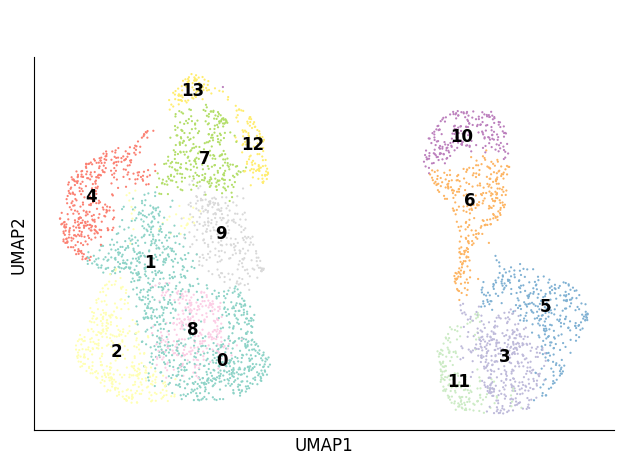

In [5]:
sdh.plot_CellType_UMAP(resolution=0.8,celltype=False)

## Step 4: Visualize the High-Risk cells identified by ***SIDISH***

<Figure size 800x600 with 0 Axes>

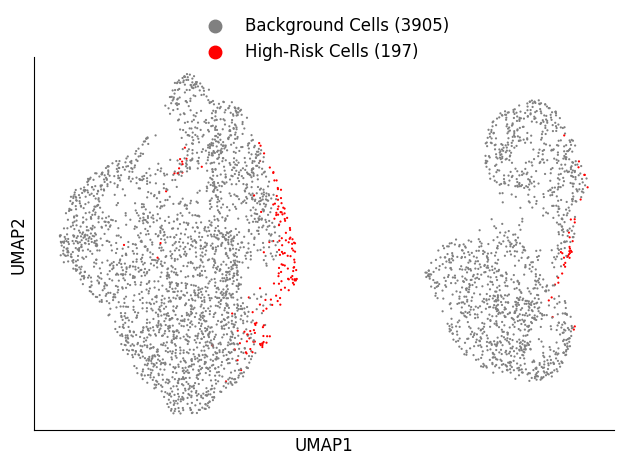

In [7]:
sdh.plot_HighRisk_UMAP(resolution = 0.08, celltype=False)

## Step 5: Find upregulated and down-regulated genes between High-Risk and Background cells identified by ***SIDISH***

In [8]:
upregulated_genes, downregulated_genes = sdh.get_MarkerGenes()

In [9]:
upregulated_genes

array(['BNIP3', 'SLC2A1', 'NDUFA4L2', 'NDRG1', 'CA9', 'LDHA', 'ERO1A',
       'VEGFA', 'PNISR', 'P4HA1', 'PLOD2', 'ENO1', 'NUPR1', 'WSB1',
       'CXCR4', 'HIST1H2AC', 'HIST1H2BG', 'XIST', 'EGLN3', 'ADM', 'GBE1',
       'SKIL', 'VLDLR', 'DDIT3', 'NMB', 'BRD2', 'KIT', 'HSPA1A',
       'SLC16A3', 'SAT1', 'CAMK1D', 'SLC25A37', 'HIST2H2BE', 'JUN',
       'KLF6', 'STK4', 'ANKRD37', 'ZCCHC11', 'PJA2', 'FOXP1', 'IGBP1',
       'NT5C3A', 'FBXO32', 'AQP5', 'HIST1H2AE', 'NCK1', 'MDM4', 'SHPRH',
       'PMEPA1', 'SMARCA2', 'CORO1C', 'TTC17', 'TUBA1A', 'WDR72',
       'HILPDA', 'USE1', 'YPEL2', 'CYP20A1', 'TTLL4', 'DSC2', 'BACE2',
       'WDR60', 'WEE1', 'SMAD2', 'PBRM1', 'PIK3IP1', 'GALNT2', 'TWF1',
       'EGLN1', 'TFRC', 'TMEM167B', 'VIM', 'DCK', 'FNBP1', 'RLF',
       'C1orf198', 'BAIAP2L1', 'DENND1B', 'C1GALT1', 'MEF2A', 'CLEC2B',
       'KIAA1551', 'CTDSPL2', 'CHMP4C', 'TFF3', 'BLOC1S6', 'SLC35B3',
       'MXD1', 'PTPRK', 'IFI27L1', 'MIB2', 'TUBE1', 'PGAP2', 'U2AF1L4',
       'ZNF576', 'QKI'

In [10]:
downregulated_genes

array(['S100A7', 'CEACAM6', 'SPRR2D', 'CDK1', 'IFIT3', 'TPX2', 'PLS3',
       'ACOT7', 'RDH10', 'PLAC8', 'RPS4Y1', 'HLA-DMB', 'SFTA3', 'NUSAP1',
       'NAPSA', 'AREG', 'AGR2', 'NMU', 'SLC34A2', 'CDC20', 'AQP3', 'WARS',
       'GBP5', 'LCN2', 'BIRC5', 'IFI35', 'S100A8', 'TOP2A', 'RARRES1',
       'CXCL10', 'SAA1', 'HOPX', 'UBE2C'], dtype=object)

## Step 6: Visualize the survival curve of patients witha high expression of upregulated genes found in the SIDISH identified cells

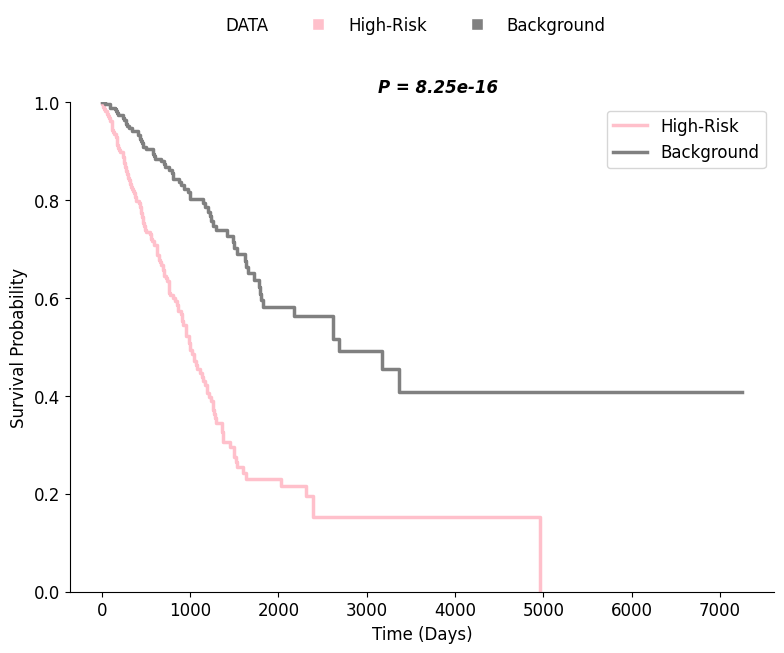

In [11]:
sdh.plot_KM()